In [ ]:
import pandas as pd
import yfinance as yf
from datetime import date,timedelta

In [ ]:
# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

In [ ]:
# list of stock tickers to download
tickers = ['AAPL','MSFT','NFLX','GOOG','TSLA']
data = yf.download(tickers, start=start_date, end=end_date, progress=False)

In [ ]:
# reset index to bring Date into the columns for the melt function
data = data.reset_index()
data

Price        Date   Adj Close                                                  \
Ticker                   AAPL        GOOG        MSFT        NFLX        TSLA   
0      2023-07-27  192.199265  129.722382  328.152954  413.170013  255.710007   
1      2023-07-28  194.795486  132.858810  335.743561  425.779999  266.440002   
2      2023-07-31  195.412216  132.958694  333.312622  438.970001  267.429993   
3      2023-08-01  194.576660  131.740082  333.729340  438.619995  261.070007   
4      2023-08-02  191.562668  128.493774  324.957977  429.700012  254.110001   
..            ...         ...         ...         ...         ...         ...   
246    2024-07-19  224.309998  179.389999  437.109985  633.340027  239.199997   
247    2024-07-22  223.960007  183.350006  442.940002  647.500000  251.509995   
248    2024-07-23  225.009995  183.600006  444.850006  642.760010  246.380005   
249    2024-07-24  218.539993  174.369995  428.899994  635.989990  215.990005   
250    2024-07-25  217.490005  169.160004  418.399994  634.090027  220.250000   

Price        Close                                      ...        Open  \
Ticker        AAPL        GOOG        MSFT        NFLX  ...        AAPL   
0       193.220001  129.869995  330.720001  413.170013  ...  196.020004   
1       195.830002  133.009995  338.369995  425.779999  ...  194.669998   
2       196.449997  133.110001  335.920013  438.970001  ...  196.059998   
3       195.610001  131.889999  336.339996  438.619995  ...  196.240005   
4       192.580002  128.639999  327.500000  429.700012  ...  195.039993   
..             ...         ...         ...         ...  ...         ...   
246     224.309998  179.389999  437.109985  633.340027  ...  224.820007   
247     223.960007  183.350006  442.940002  647.500000  ...  227.009995   
248     225.009995  183.600006  444.850006  642.760010  ...  224.369995   
249     218.539993  174.369995  428.899994  635.989990  ...  224.000000   
250     217.490005  169.160004  418.399994  634.090027  ...  218.929993   

Price                                                     Volume            \
Ticker        GOOG        MSFT        NFLX        TSLA      AAPL      GOOG   
0       131.800003  340.480011  426.899994  268.309998  47460200  35931600   
1       130.970001  333.670013  415.559998  259.859985  48291400  26971000   
2       133.009995  336.920013  426.510010  267.480011  38824100  18381900   
3       130.854996  335.190002  437.369995  266.260010  35175100  22154300   
4       129.839996  333.630005  435.230011  255.570007  50389300  22705800   
..             ...         ...         ...         ...       ...       ...   
246     180.369995  433.100006  660.640015  247.789993  49151500  14485900   
247     182.350006  441.790009  639.500000  244.210007  48201800  16303900   
248     183.839996  443.899994  647.500000  253.600006  39960300  23772600   
249     175.389999  440.450012  635.739990  225.419998  61777600  31250700   
250     174.250000  428.799988  641.000000  216.800003  51328200  28927100   

Price                                 
Ticker      MSFT     NFLX       TSLA  
0       39635300  6594500  103697300  
1       28484900  6424200  111446000  
2       25446000  6587600   84582200  
3       18311900  5711500   83166000  
4       27761300  4912200  101752900  
..           ...      ...        ...  
246     20940400  9815600   87403900  
247     15808800  5219100  101225400  
248     13107100  2463600  111928200  
249     26805800  4888200  167942900  
250     29904800  4550400  100389800  

[251 rows x 31 columns]

In [ ]:
# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attiribute','Ticker'])
data_melted

,Date,Attiribute,Ticker,value
0,2023-07-27,Adj Close,AAPL,1.921993e+02
1,2023-07-28,Adj Close,AAPL,1.947955e+02
2,2023-07-31,Adj Close,AAPL,1.954122e+02
3,2023-08-01,Adj Close,AAPL,1.945767e+02
4,2023-08-02,Adj Close,AAPL,1.915627e+02
...,...,...,...,...
7525,2024-07-19,Volume,TSLA,8.740390e+07
7526,2024-07-22,Volume,TSLA,1.012254e+08
7527,2024-07-23,Volume,TSLA,1.119282e+08
7528,2024-07-24,Volume,TSLA,1.679429e+08


In [ ]:
# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date','Ticker'], columns = 'Attiribute', values ='value', aggfunc='first')
data_pivoted

Attiribute          Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2023-07-27 AAPL    192.199265  193.220001  197.199997  192.550003  196.020004   
           GOOG    129.722382  129.869995  133.600006  129.179993  131.800003   
           MSFT    328.152954  330.720001  341.329987  329.049988  340.480011   
           NFLX    413.170013  413.170013  427.519989  411.880005  426.899994   
           TSLA    255.710007  255.710007  269.130005  255.300003  268.309998   
...                       ...         ...         ...         ...         ...   
2024-07-25 AAPL    217.490005  217.490005  220.850006  214.619995  218.929993   
           GOOG    169.160004  169.160004  175.199997  169.050003  174.250000   
           MSFT    418.399994  418.399994  429.799988  417.510010  428.799988   
           NFLX    634.090027  634.090027  649.979980  621.700012  641.000000   
           TSLA    220.250000  220.250000  226.000000  216.229996  216.800003   

Attiribute              Volume  
Date       Ticker               
2023-07-27 AAPL     47460200.0  
           GOOG     35931600.0  
           MSFT     39635300.0  
           NFLX      6594500.0  
           TSLA    103697300.0  
...                        ...  
2024-07-25 AAPL     51328200.0  
           GOOG     28927100.0  
           MSFT     29904800.0  
           NFLX      4550400.0  
           TSLA    100389800.0  

[1255 rows x 6 columns]

In [ ]:
# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()
stock_data

Attiribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-07-27,AAPL,192.199265,193.220001,197.199997,192.550003,196.020004,47460200.0
1,2023-07-27,GOOG,129.722382,129.869995,133.600006,129.179993,131.800003,35931600.0
2,2023-07-27,MSFT,328.152954,330.720001,341.329987,329.049988,340.480011,39635300.0
3,2023-07-27,NFLX,413.170013,413.170013,427.519989,411.880005,426.899994,6594500.0
4,2023-07-27,TSLA,255.710007,255.710007,269.130005,255.300003,268.309998,103697300.0
...,...,...,...,...,...,...,...,...
1250,2024-07-25,AAPL,217.490005,217.490005,220.850006,214.619995,218.929993,51328200.0
1251,2024-07-25,GOOG,169.160004,169.160004,175.199997,169.050003,174.250000,28927100.0
1252,2024-07-25,MSFT,418.399994,418.399994,429.799988,417.510010,428.799988,29904800.0
1253,2024-07-25,NFLX,634.090027,634.090027,649.979980,621.700012,641.000000,4550400.0


The data we collected contains the following columns:


* **Date:** The date of the stock data entry.
* **Ticker:** The stock ticker symbol.
* **Adj Close:** The adjusted closing price of the stock, which accounts for any corporate actions like splits or dividends.
* **Close:** The closing price of the stock.
* **High:** The highest price of the stock during the trading day.
* **Low:** The lowest price of the stock during the trading day.
* **Open:** The opening price of the stock.
* **Volume:** The number of shares traded during the day.



In [ ]:
# Convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Set the 'Date' column as the index of the dataframe
stock_data.set_index('Date', inplace = True)
stock_data

Attiribute,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2023-07-27,AAPL,192.199265,193.220001,197.199997,192.550003,196.020004,47460200.0
2023-07-27,GOOG,129.722382,129.869995,133.600006,129.179993,131.800003,35931600.0
2023-07-27,MSFT,328.152954,330.720001,341.329987,329.049988,340.480011,39635300.0
2023-07-27,NFLX,413.170013,413.170013,427.519989,411.880005,426.899994,6594500.0
2023-07-27,TSLA,255.710007,255.710007,269.130005,255.300003,268.309998,103697300.0
...,...,...,...,...,...,...,...
2024-07-25,AAPL,217.490005,217.490005,220.850006,214.619995,218.929993,51328200.0
2024-07-25,GOOG,169.160004,169.160004,175.199997,169.050003,174.250000,28927100.0
2024-07-25,MSFT,418.399994,418.399994,429.799988,417.510010,428.799988,29904800.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

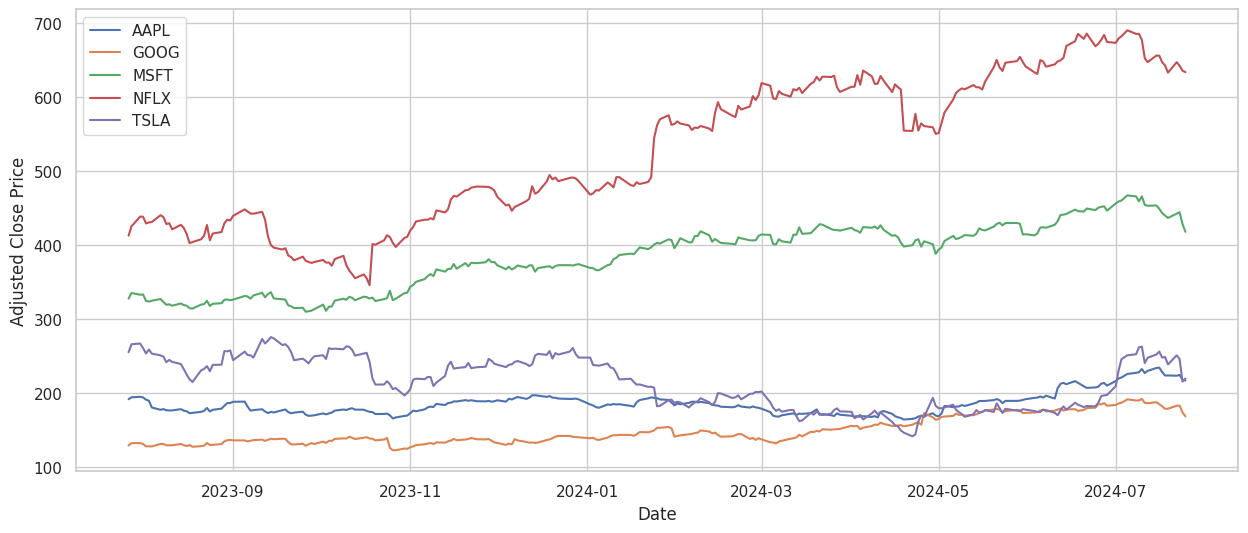

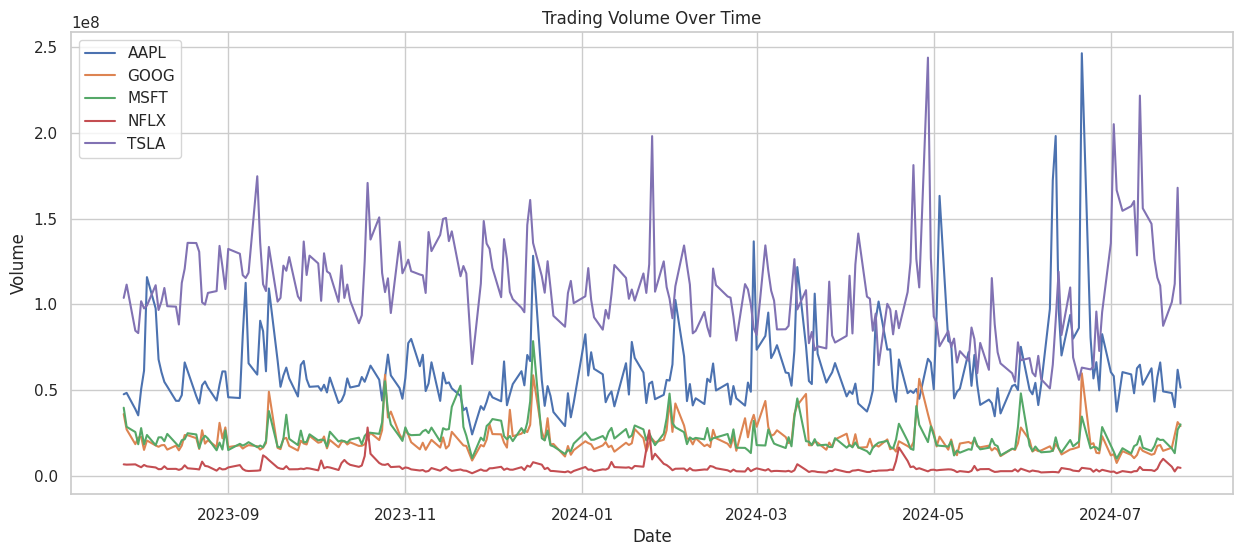

In [ ]:
# plotting the adjusted close prices for each ticker over time
plt.figure(figsize=(15,6))
for ticker in stock_data['Ticker'].unique():
  subset = stock_data[stock_data['Ticker'] == ticker]
  plt.plot(subset.index,subset['Adj Close'], label=ticker)

plt.plot(title = 'Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# plotting the trading volume for each ticker over time
plt.figure(figsize=(15,6))
for ticker in stock_data['Ticker'].unique():
  subset = stock_data[stock_data['Ticker']==ticker]
  plt.plot(subset.index,subset['Volume'], label=ticker)

plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Compute the Z-scores for both the adjusted close prices and trading volumes for each stock and then identify any data points that exceed this threshold:

In [ ]:
from scipy.stats import zscore
def detect_anomalies(df, column):
  df_copy = df.copy()

  # Calculate Z-scores and add them  as a new column
  df_copy['Z-score']=zscore(df_copy[column])

  # Find where the absolute Z-score is greater than 2 (Common threshold for anomalies)
  anomalies = df_copy[abs(df_copy['Z-score']) > 2]
  return anomalies

anomalies_adj_close = pd.DataFrame()
anomalies_volume = pd.DataFrame()

for ticker in stock_data['Ticker'].unique():
  data_ticker = stock_data[stock_data['Ticker'] == ticker]

  adj_close_anomalies = detect_anomalies(data_ticker, 'Adj Close')
  volume_anomalies = detect_anomalies(data_ticker, 'Volume')

  # Use concat instead of append
  anomalies_adj_close = pd.concat([anomalies_adj_close,adj_close_anomalies])
  anomalies_volume = pd.concat([anomalies_volume, volume_anomalies])

print(anomalies_adj_close.head())

Attiribute Ticker   Adj Close       Close        High         Low        Open  \
Date                                                                            
2024-07-02   AAPL  220.270004  220.270004  220.380005  215.100006  216.149994   
2024-07-03   AAPL  221.550003  221.550003  221.550003  219.029999  220.000000   
2024-07-05   AAPL  226.339996  226.339996  226.449997  221.649994  221.649994   
2024-07-08   AAPL  227.820007  227.820007  227.850006  223.250000  227.089996   
2024-07-09   AAPL  228.679993  228.679993  229.399994  226.369995  227.929993   

Attiribute      Volume   Z-score  
Date                              
2024-07-02  58046200.0  2.223067  
2024-07-03  37369800.0  2.306490  
2024-07-05  60412400.0  2.618674  
2024-07-08  59085900.0  2.715132  
2024-07-09  48076100.0  2.771181  


In [ ]:
print(anomalies_volume.head())

Attiribute Ticker   Adj Close       Close        High         Low        Open  \
Date                                                                            
2023-08-04   AAPL  181.028610  181.990005  187.380005  181.919998  185.520004   
2023-09-07   AAPL  176.860504  177.559998  178.210007  173.539993  175.179993   
2023-12-15   AAPL  197.050949  197.570007  198.399994  197.000000  197.529999   
2024-02-29   AAPL  180.505173  180.750000  182.570007  179.529999  181.270004   
2024-03-15   AAPL  172.386185  172.619995  172.619995  170.289993  171.169998   

Attiribute       Volume   Z-score  
Date                               
2023-08-04  115799700.0  2.246293  
2023-09-07  112488800.0  2.111653  
2023-12-15  128256700.0  2.752866  
2024-02-29  136682600.0  3.095512  
2024-03-15  121664700.0  2.484798  


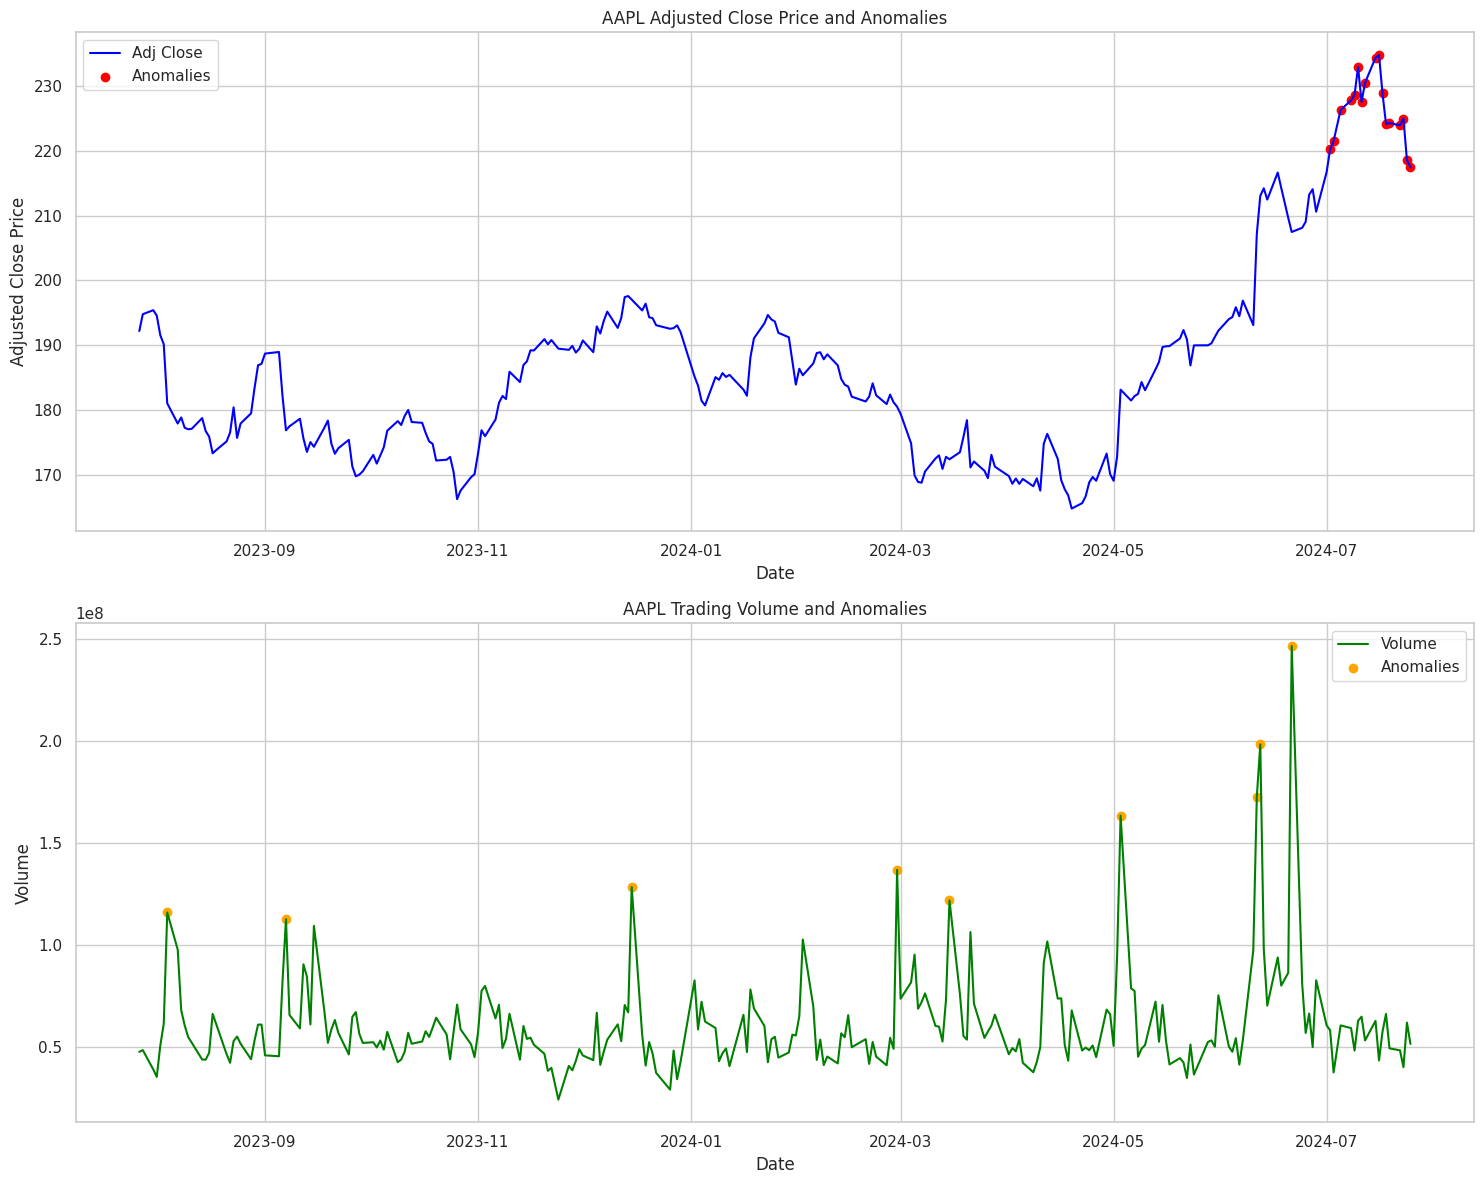

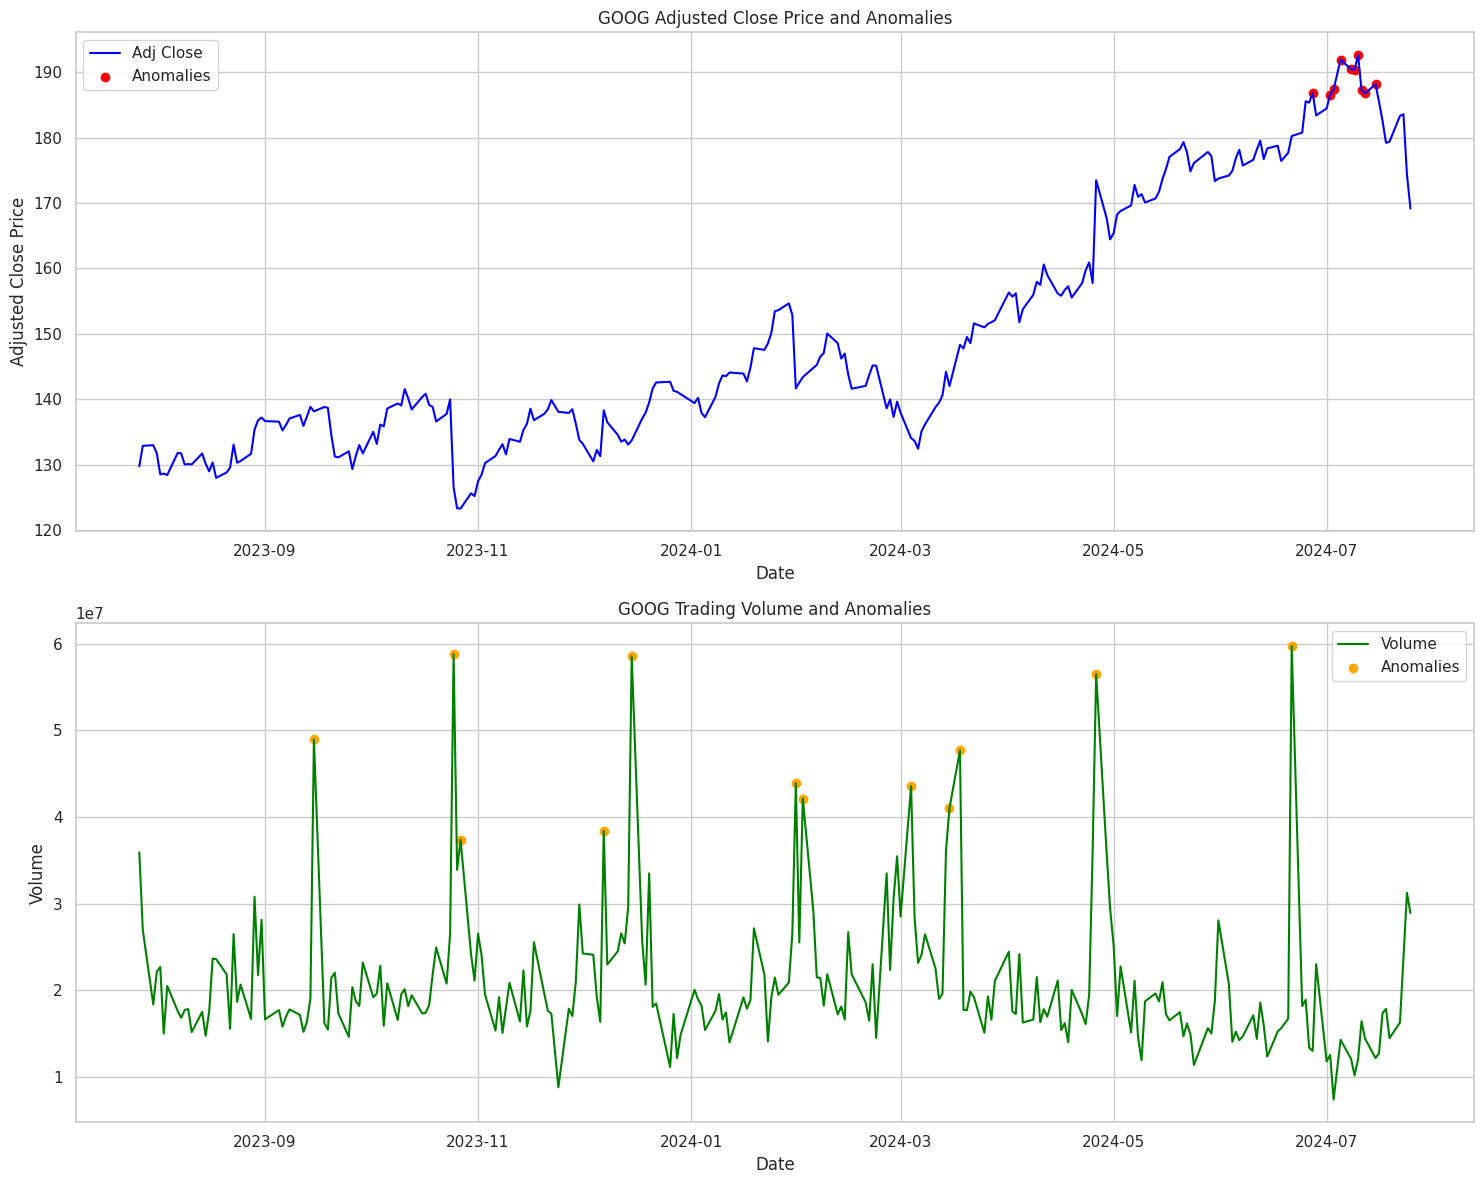

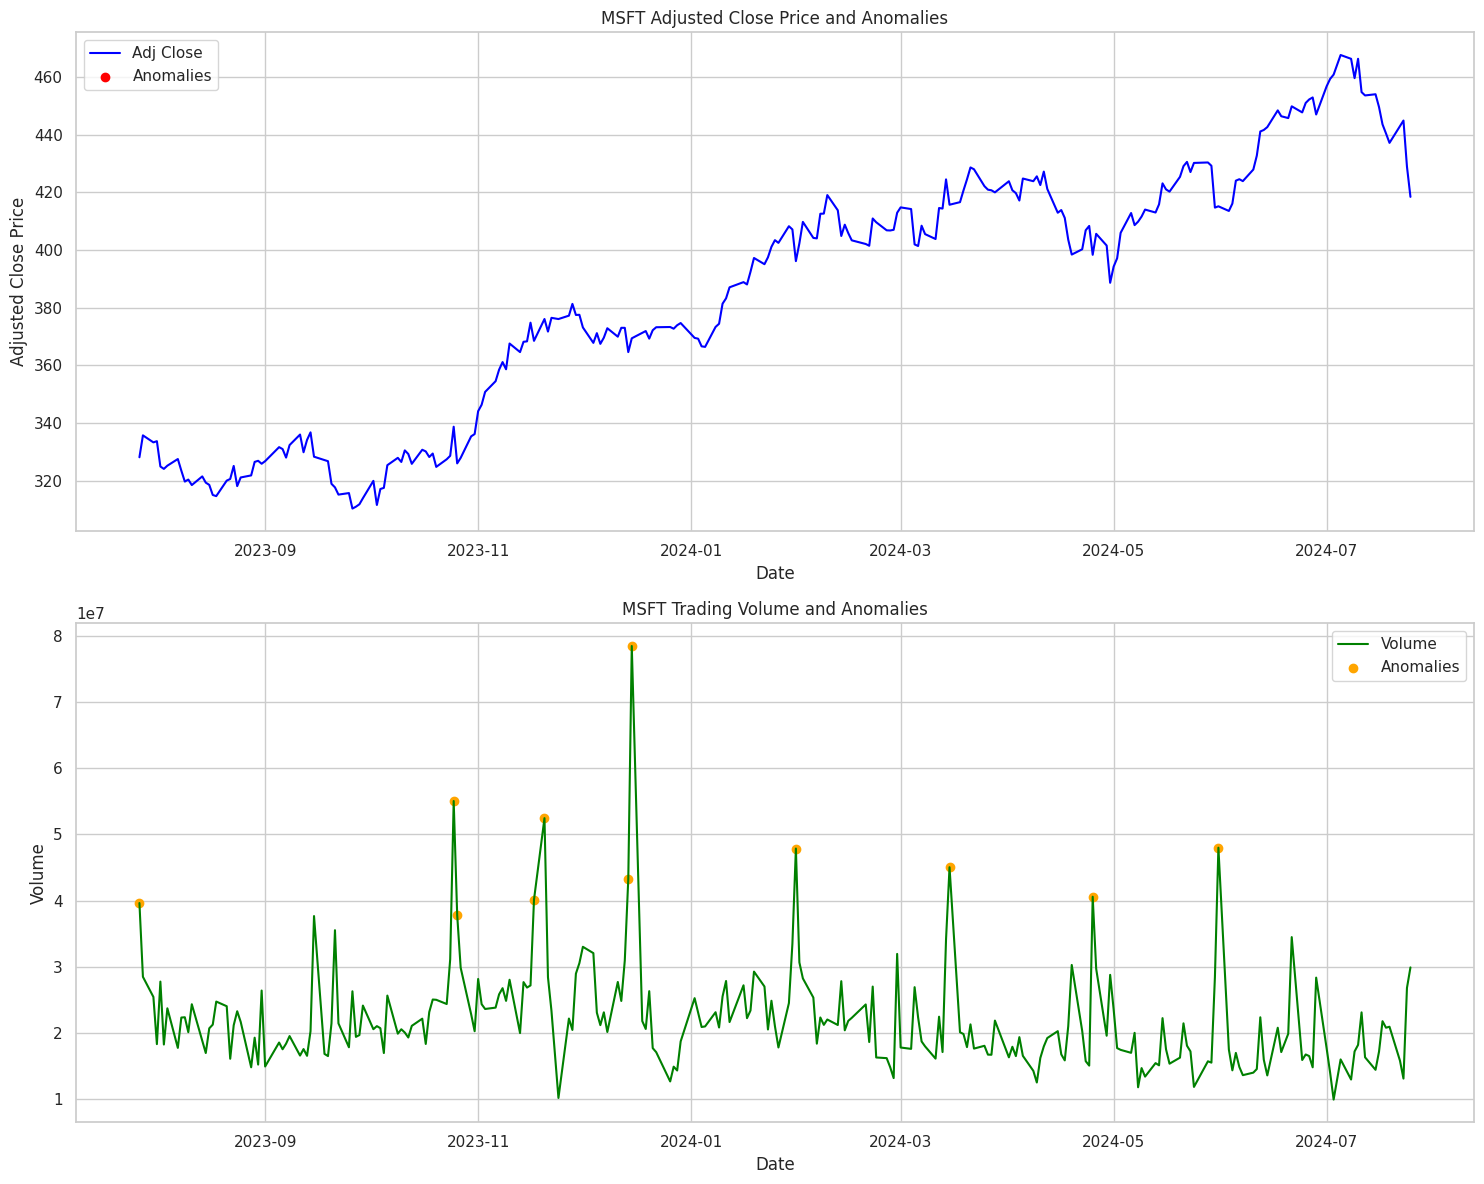

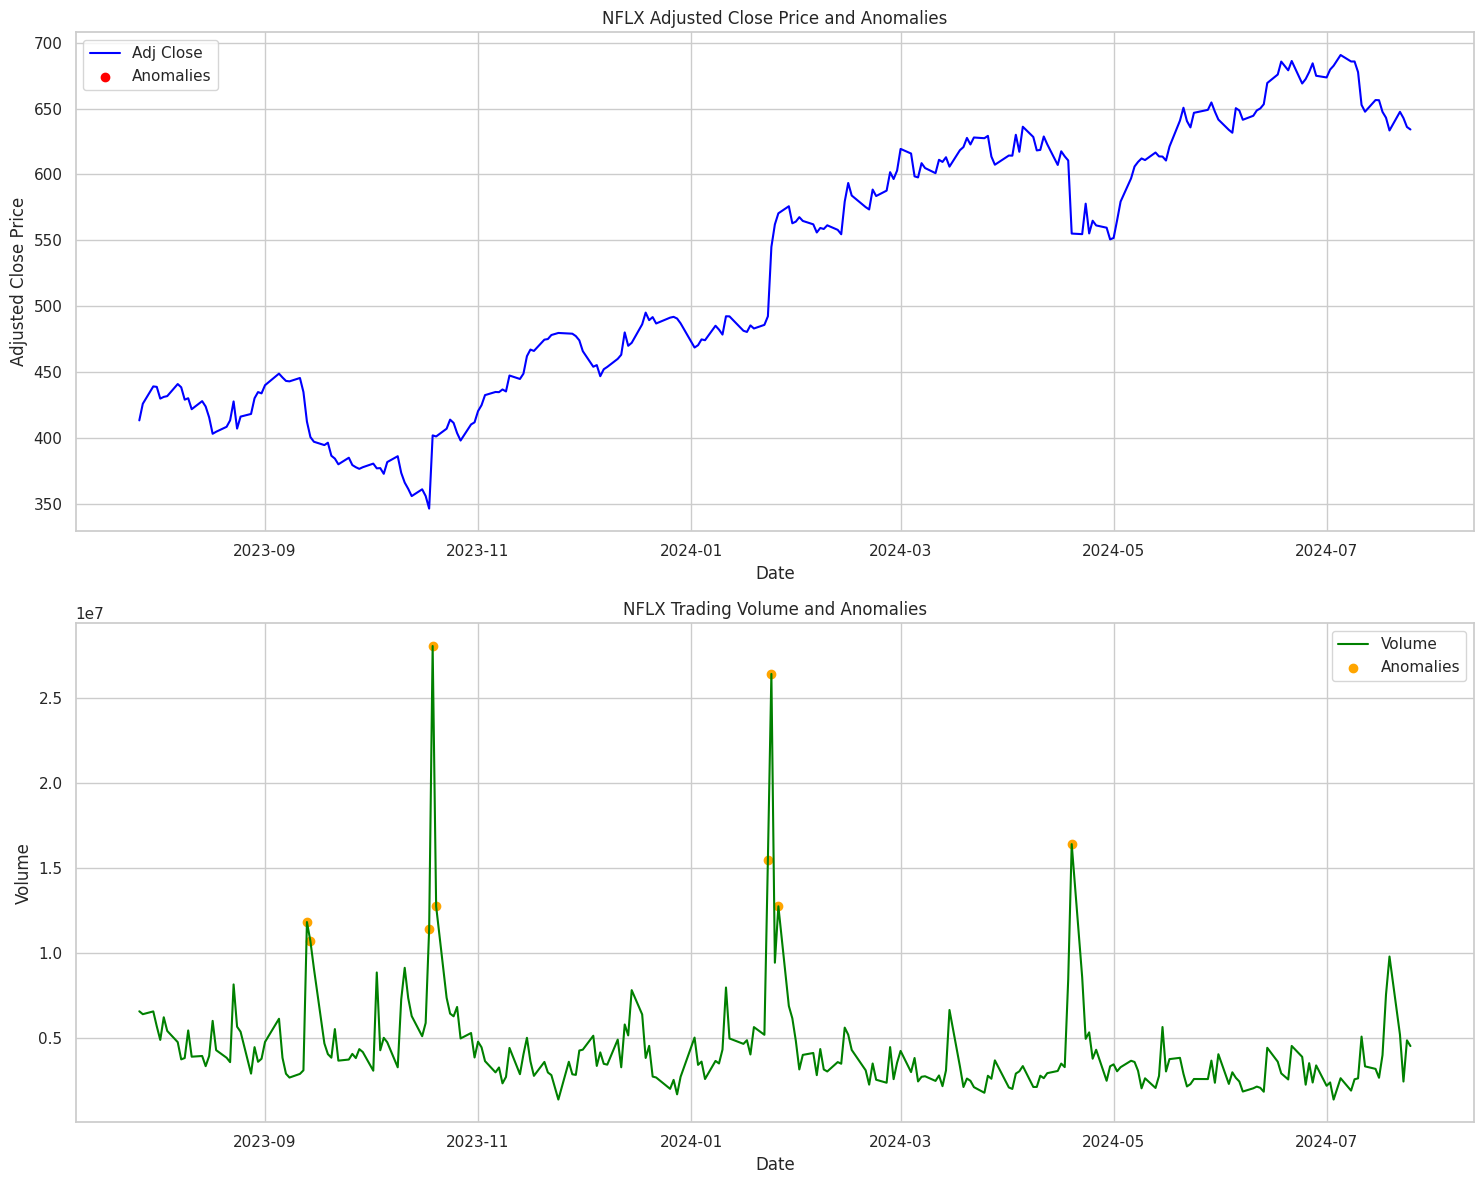

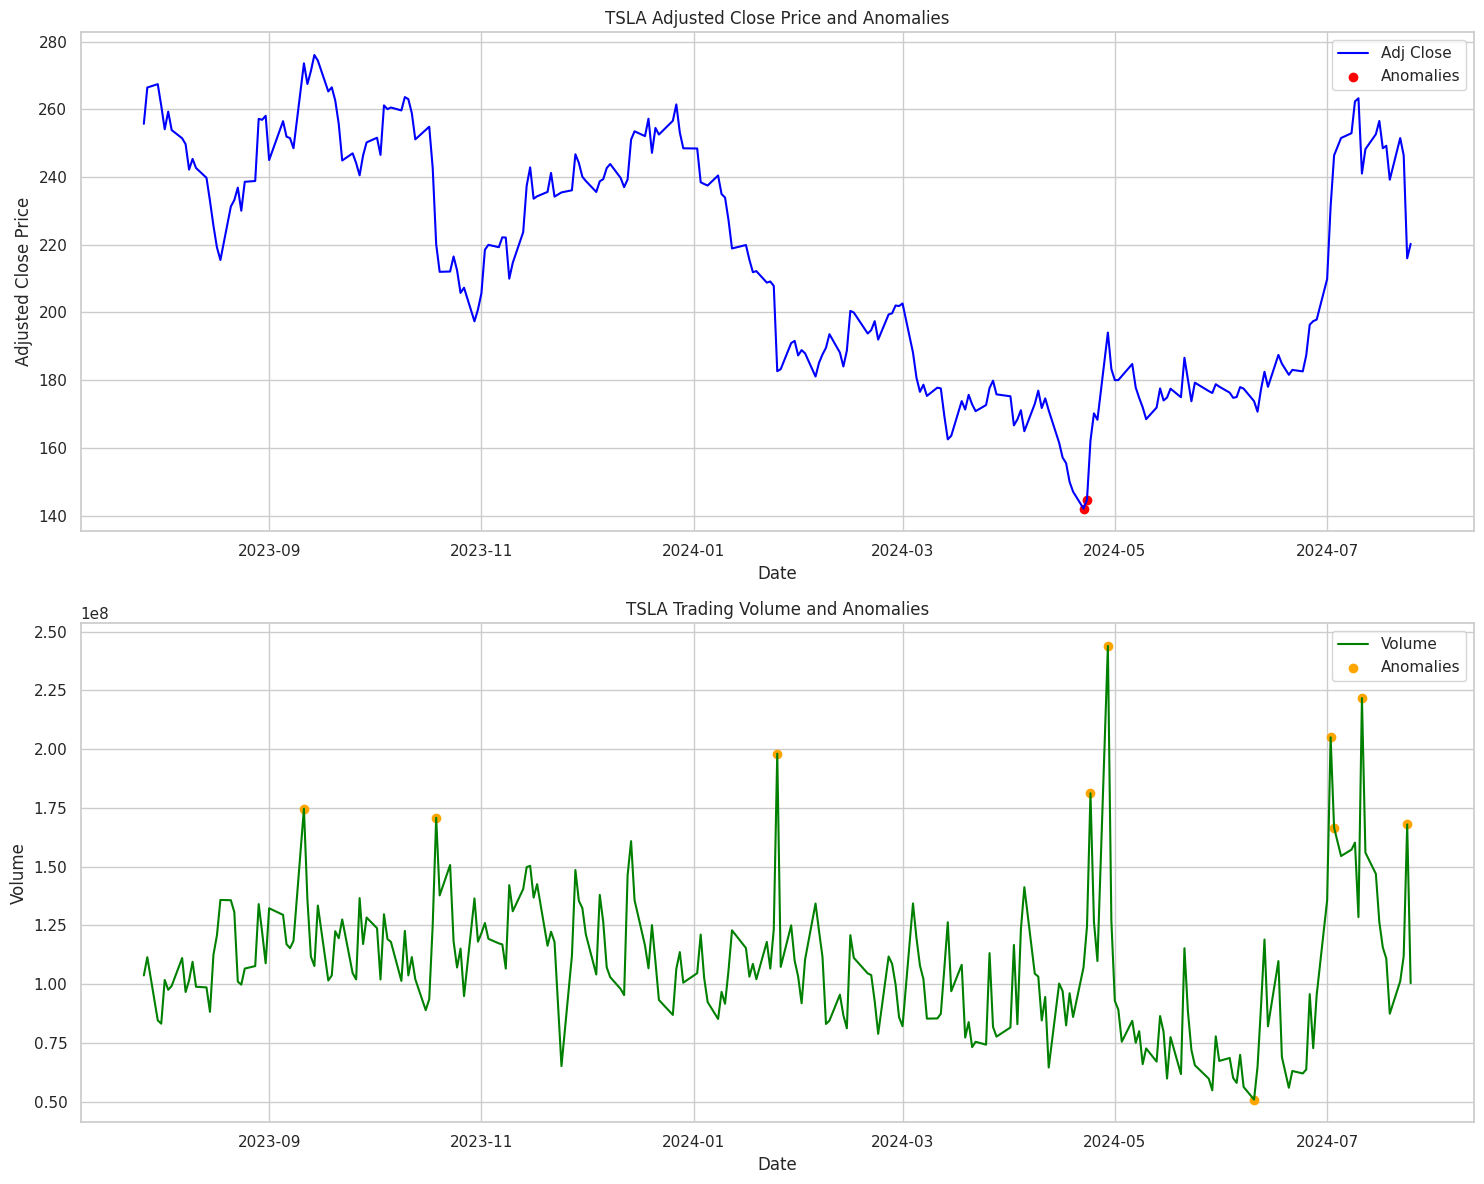

In [ ]:
def plot_anomalies(ticker, anomalies_adj_close,anomalies_volume):
  # Filter the main and anomalies data for the given ticker
  data_ticker = stock_data[stock_data['Ticker'] == ticker]
  adj_close_anomalies = anomalies_adj_close[anomalies_adj_close['Ticker'] == ticker]
  volume_anomalies = anomalies_volume[anomalies_volume['Ticker'] == ticker]

  # Plotting
  fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(15,12))

  # Adjusted close price
  ax1.plot(data_ticker.index, data_ticker['Adj Close'], label='Adj Close', color = 'blue')
  ax1.scatter(adj_close_anomalies.index, adj_close_anomalies['Adj Close'], label='Anomalies', color ='red')
  ax1.set_title(f'{ticker} Adjusted Close Price and Anomalies')
  ax1.set_xlabel('Date')
  ax1.set_ylabel('Adjusted Close Price')
  ax1.legend()

  # Volume
  ax2.plot(data_ticker.index, data_ticker['Volume'], label='Volume', color='green')
  ax2.scatter(volume_anomalies.index, volume_anomalies['Volume'], label='Anomalies', color='orange')
  ax2.set_title(f'{ticker} Trading Volume and Anomalies')
  ax2.set_xlabel('Date')
  ax2.set_ylabel('Volume')
  ax2.legend()

  plt.tight_layout()
  plt.show()

# Plot anomalies for each ticker
for ticker in stock_data['Ticker'].unique():
  plot_anomalies(ticker, anomalies_adj_close, anomalies_volume)


In [ ]:
# Consoladite anomalies for adjusted close prices and volumes
all_anomalies_adj_close = anomalies_adj_close[['Ticker']].copy()
all_anomalies_adj_close['Adj Close Anomaly'] = 1 # indicator variable for anomalies
all_anomalies_volume = anomalies_volume[['Ticker']].copy()
all_anomalies_volume['Volume Anomaly'] = 1  # indicator variable for anomalies

# pivot these dataframes to have one row per date and columns for each ticker, filling non-anomalies with 0
adj_close_pivot = all_anomalies_adj_close.pivot_table(index=all_anomalies_adj_close.index, columns='Ticker',
                                                       fill_value=0, aggfunc='sum')

volume_pivot = all_anomalies_volume.pivot_table(index=all_anomalies_volume.index, columns='Ticker',
                                                fill_value=0, aggfunc='sum')

# flatten the multi-level column index
adj_close_pivot.columns = adj_close_pivot.columns.get_level_values(1)
volume_pivot.columns = volume_pivot.columns.get_level_values(1)

# combine the two pivoted dataframes
combined_anomalies = pd.concat([adj_close_pivot, volume_pivot], axis=1, keys=['Adj Close Anomaly', 'Volume Anomaly'])

# calculate the correlation matrix for the anomalies
correlation_matrix = combined_anomalies.corr()

print(correlation_matrix)

                         Adj Close Anomaly                     Volume Anomaly  \
Ticker                                AAPL      GOOG      TSLA           AAPL   
                  Ticker                                                        
Adj Close Anomaly AAPL            1.000000  0.140028 -0.793492            NaN   
                  GOOG            0.140028  1.000000 -0.333333            NaN   
                  TSLA           -0.793492 -0.333333  1.000000            NaN   
Volume Anomaly    AAPL                 NaN       NaN       NaN       1.000000   
                  GOOG                 NaN       NaN       NaN       0.062243   
                  MSFT                 NaN       NaN       NaN      -0.039611   
                  NFLX                 NaN       NaN       NaN      -0.264706   
                  TSLA                 NaN       NaN       NaN      -0.283221   

                                                                  
Ticker                        GOOG      M

In [ ]:
# calculate the mean absolute Z-score for each stock as a risk indicator
adj_close_risk = anomalies_adj_close.groupby('Ticker')['Z-score'].apply(lambda x: abs(x).mean())
volume_risk = anomalies_volume.groupby('Ticker')['Z-score'].apply(lambda x: abs(x).mean())

# combine the risk scores from both price and volume anomalies
total_risk = adj_close_risk + volume_risk

# normalize the risk scores to get a relative risk rating from 0 to 1
risk_rating = (total_risk - total_risk.min()) / (total_risk.max() - total_risk.min())

print(risk_rating)

Ticker
AAPL    1.000000
GOOG    0.367812
MSFT         NaN
NFLX         NaN
TSLA    0.000000
Name: Z-score, dtype: float64
